In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
# for data visualisation and statistical analysis
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

C:\Users\MANEESH\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('cars_sample-modified.csv')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,17/03/2016 15:47,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,private,offer,3200,test,station wagon,2006,manual,109,focus,150000,7,diesel,ford,no,17/03/2016 0:00,44534,17/03/2016 15:47
1,03/04/2016 21:47,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,private,offer,30900,test,limousine,2015,automatic,175,6_reihe,20000,6,diesel,mazda,no,03/04/2016 0:00,63808,05/04/2016 22:47
2,23/03/2016 1:57,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,private,offer,1600,test,limousine,1998,manual,101,NaN,100000,8,petrol,opel,no,23/03/2016 0:00,24983,07/04/2016 4:46
3,24/03/2016 13:39,Volkswagen_Polo_60_Servo,private,offer,999,control,small car,1996,automatic,60,polo,125000,12,petrol,volkswagen,no,24/03/2016 0:00,32049,07/04/2016 4:45
4,09/03/2016 23:44,A_Klasse_nicht_fahrbereit,private,offer,400,test,small car,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,yes,09/03/2016 0:00,72762,14/03/2016 5:44


In [4]:
df['vehicleType'] = df['vehicleType'].fillna((df['vehicleType'].mode()[0]))
df['gearbox'] = df['gearbox'].fillna((df['gearbox'].mode()[0]))
df['model'] = df['model'].fillna((df['model'].mode()[0]))
df['fuelType'] = df['fuelType'].fillna((df['fuelType'].mode()[0]))
df['notRepairedDamage'] = df['notRepairedDamage'].fillna((df['notRepairedDamage'].mode()[0]))

In [5]:
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [6]:
X = df[[ 'postalCode' ]]
Y = df.price
X = pd.get_dummies(data=X)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

C:\Users\MANEESH\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


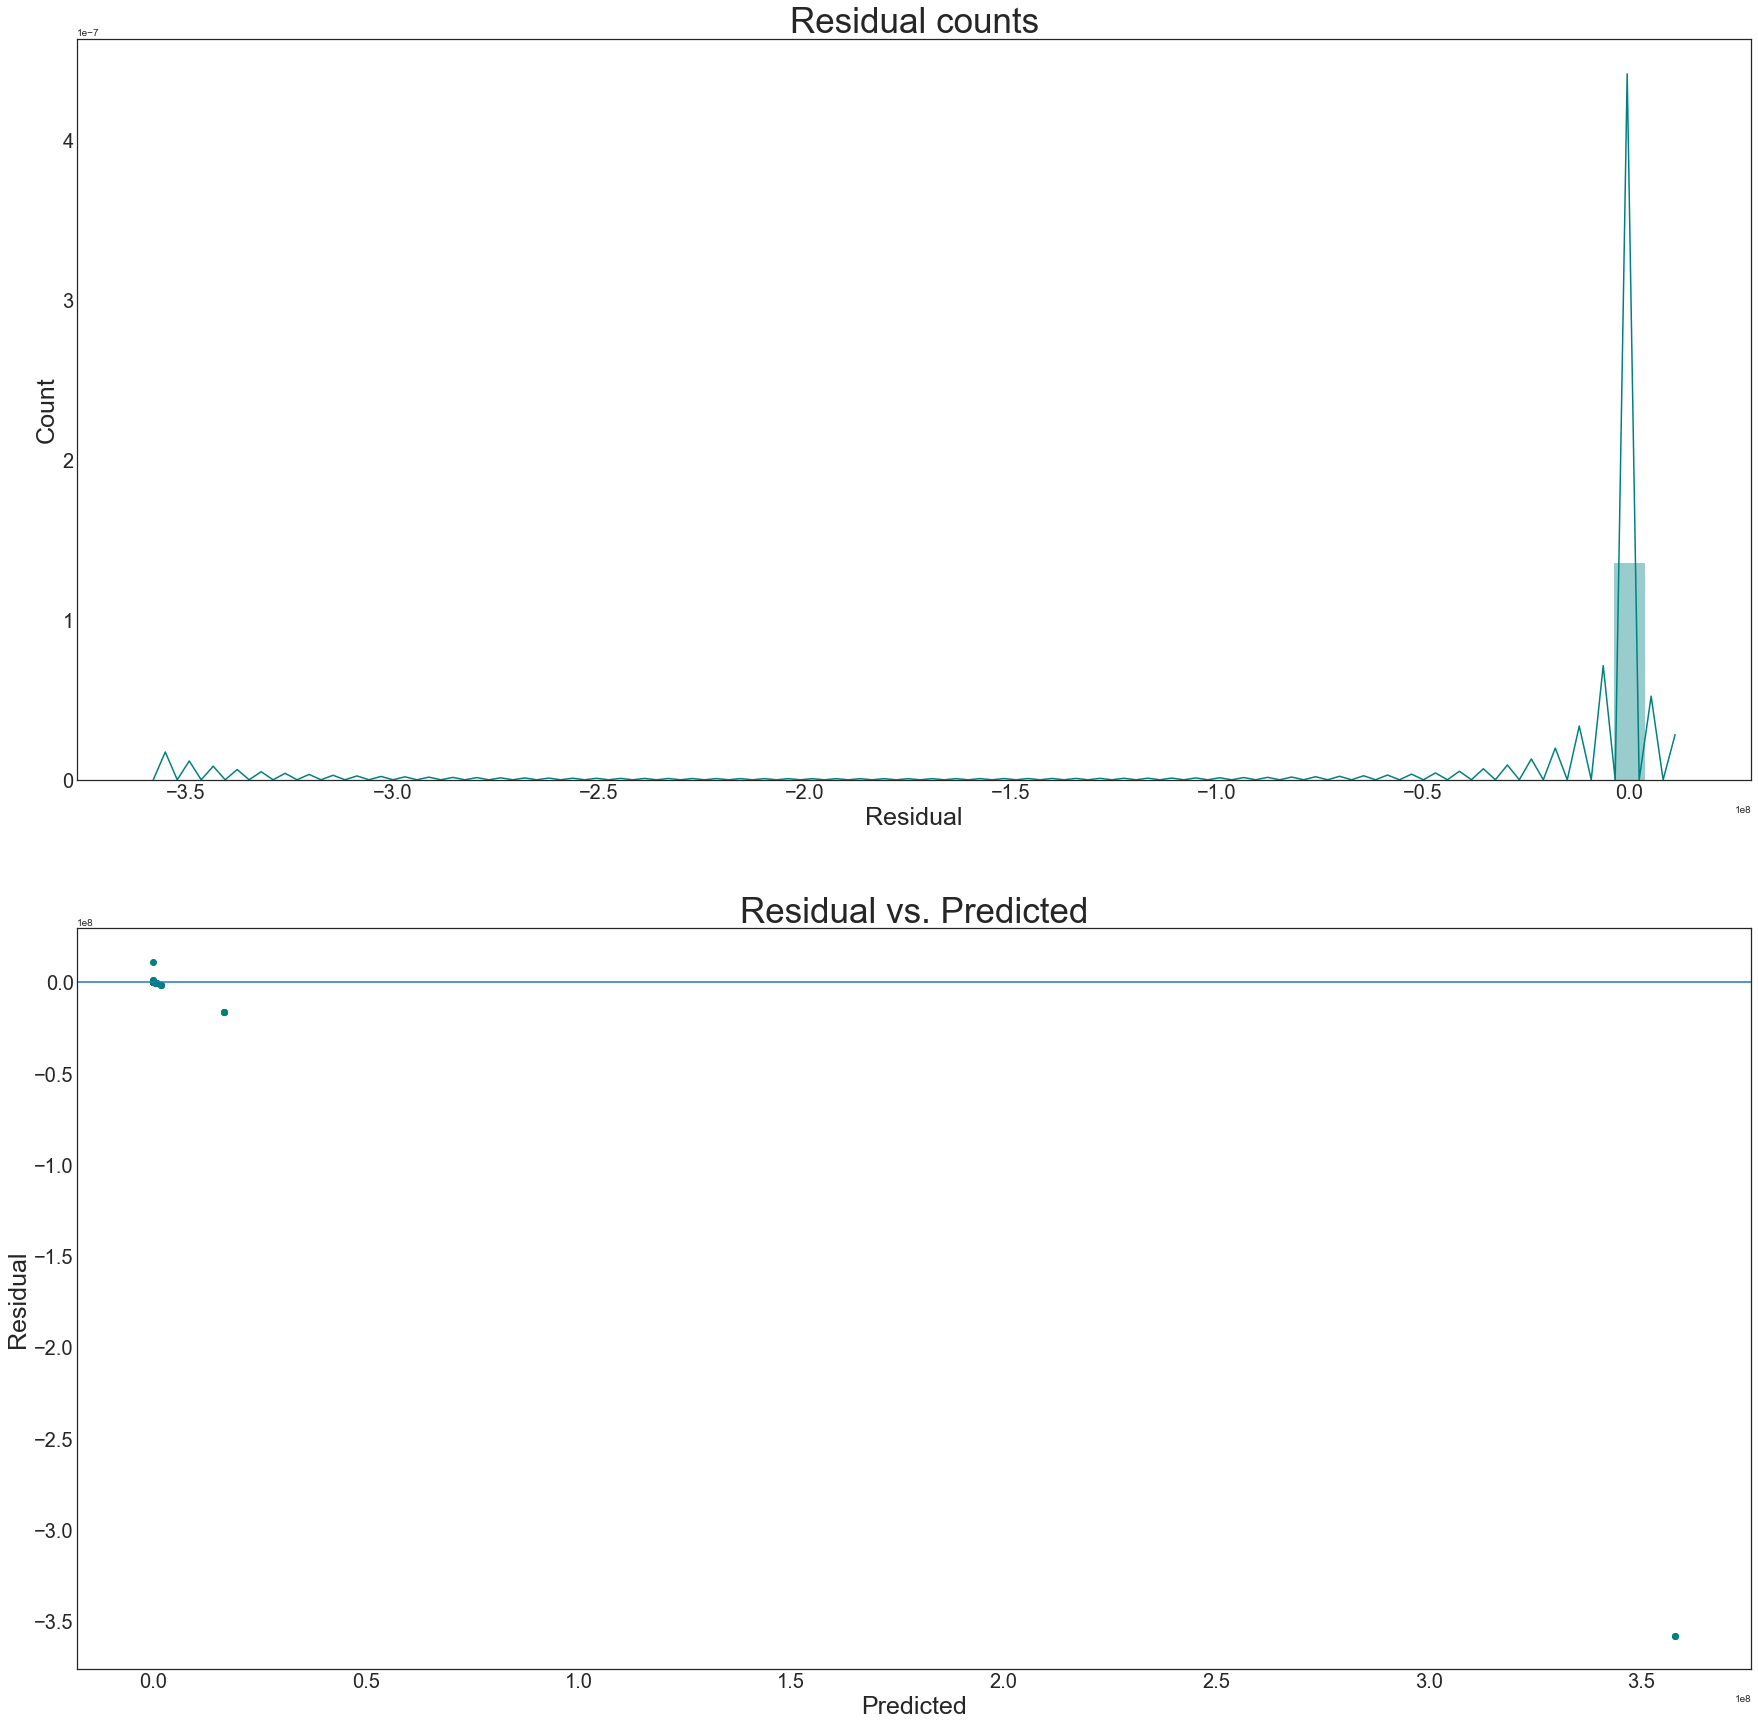

RMSE:
5071266.466618955


In [8]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [9]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: -2041.24


C:\Users\MANEESH\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


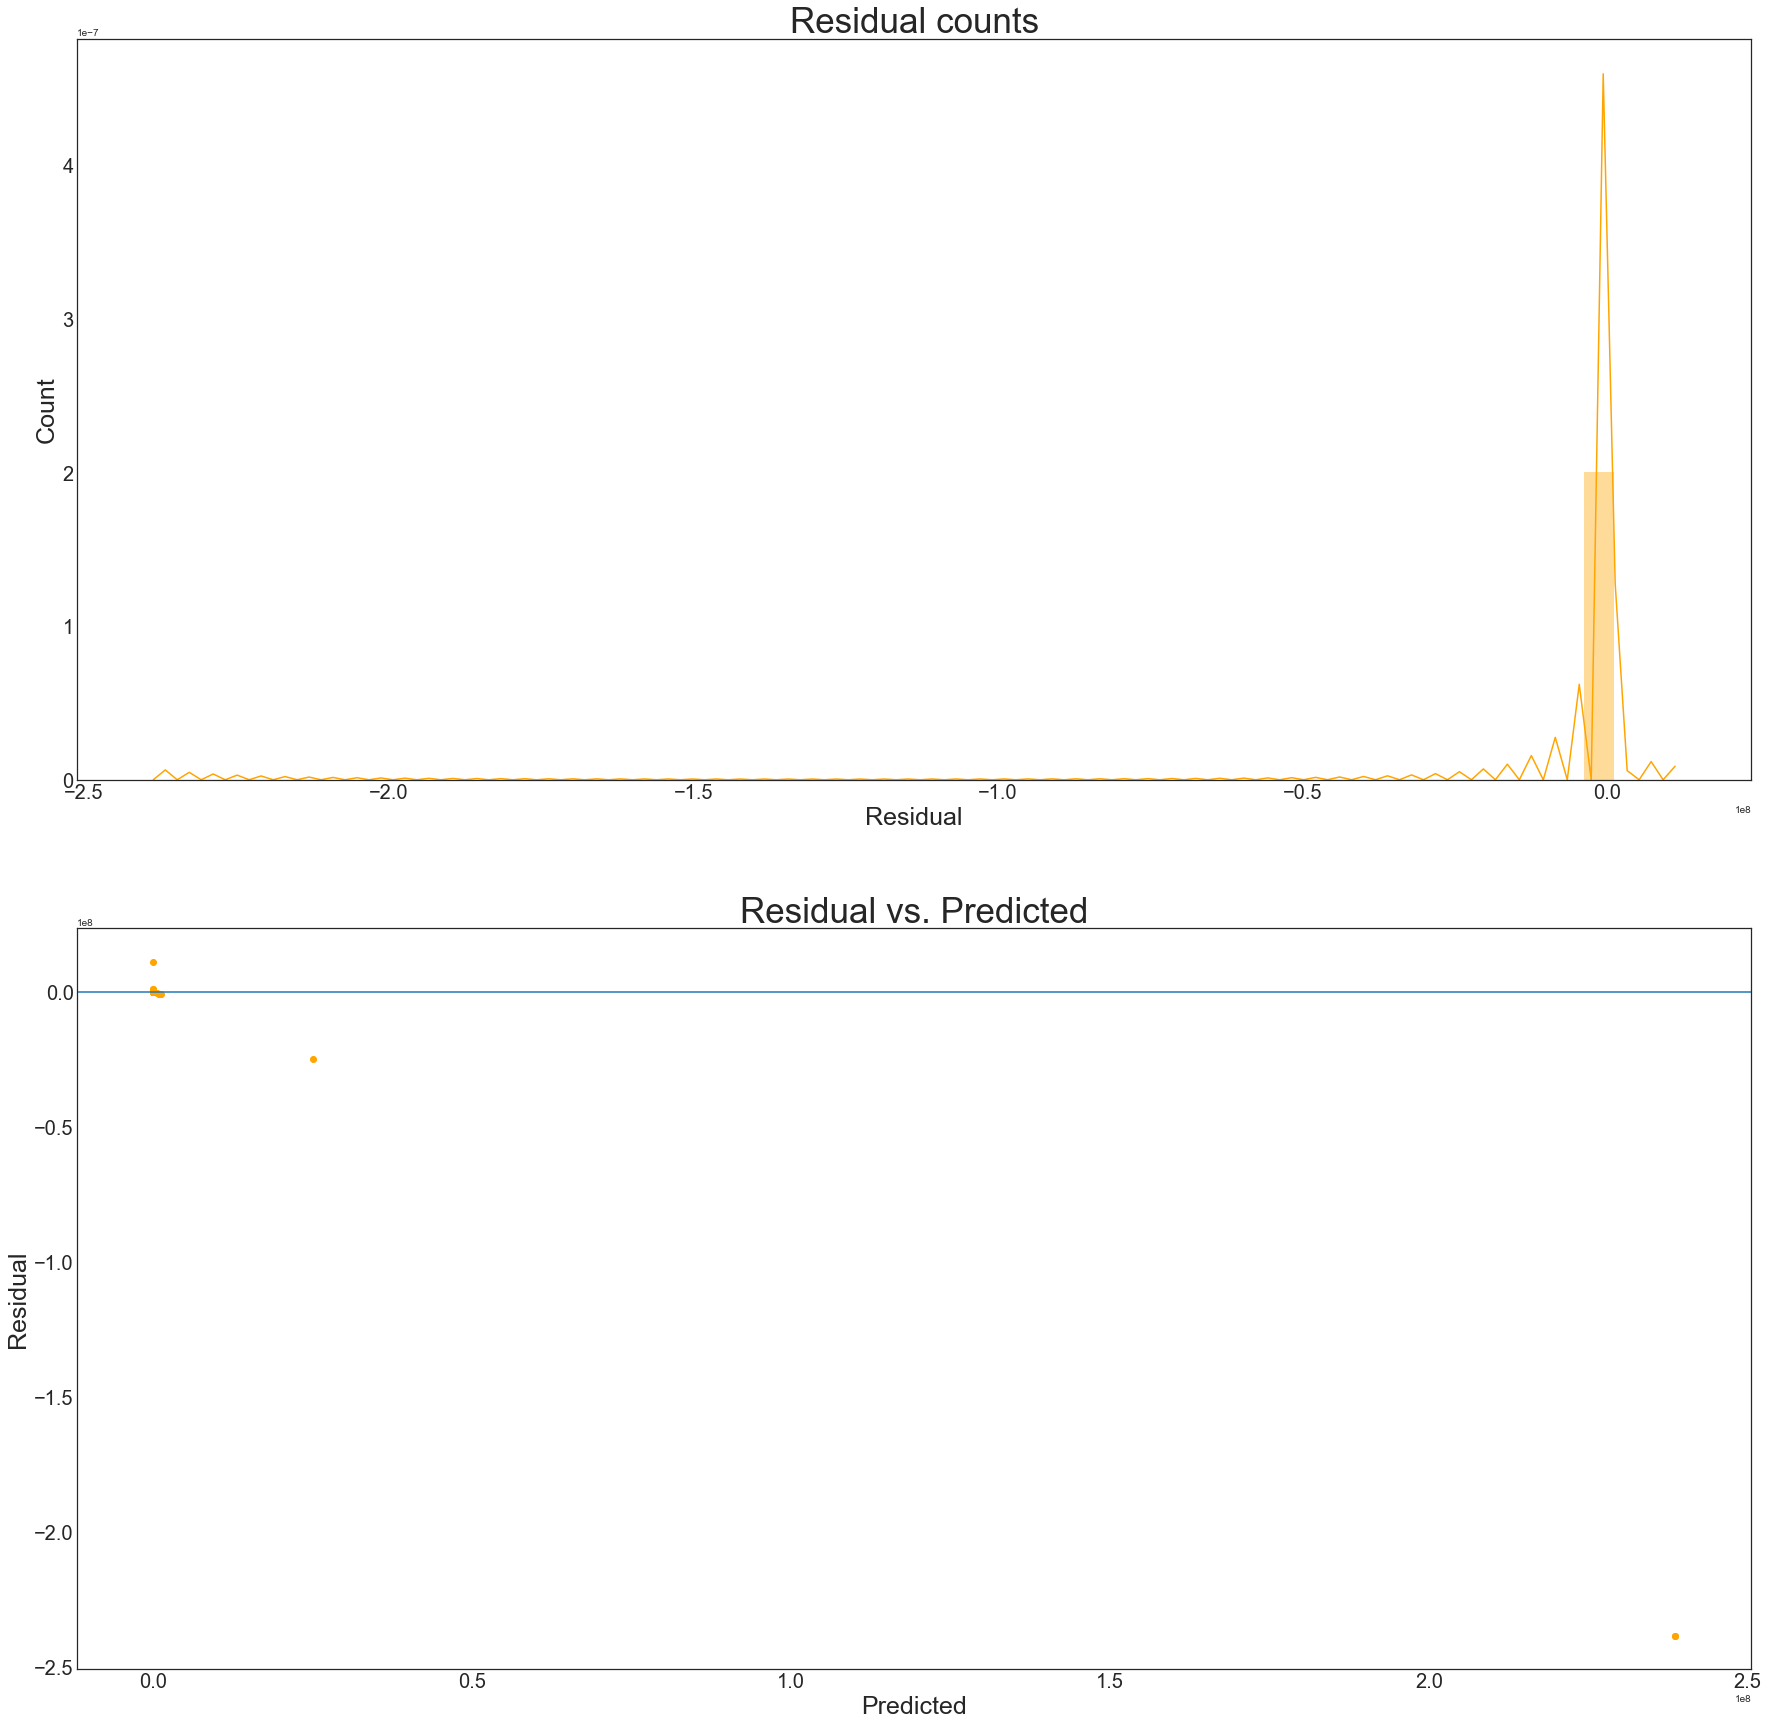

RMSE:
3385666.1142433328


In [10]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [11]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: -909.25
